## Imports e Preparação dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("dados/Sentiment.csv")

#Removendo as colunas que eu julgo serem inúteis
df = df.drop(columns=['candidate_gold', 'relevant_yn_gold', 'sentiment_gold', 'subject_matter_gold'])

#Convertendo as colunas de data para datas
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')

#Corrigindo os valores nulos 
df = df[df['relevant_yn'] == 'yes'].dropna(subset=['sentiment', 'text', 'candidate'])

#Padronizando os sentimentos (escrita)
df['sentiment'] = df['sentiment'].str.capitalize()



## Análise Exploratória

#### Distribuição de Sentimentos

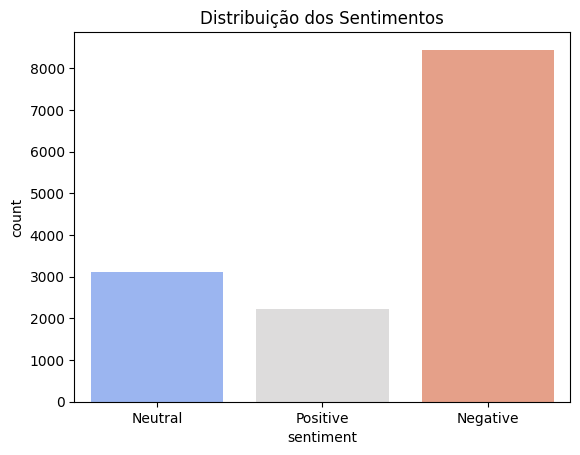

In [2]:
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Distribuição dos Sentimentos")
plt.show()


#### Sentimento por Candidato

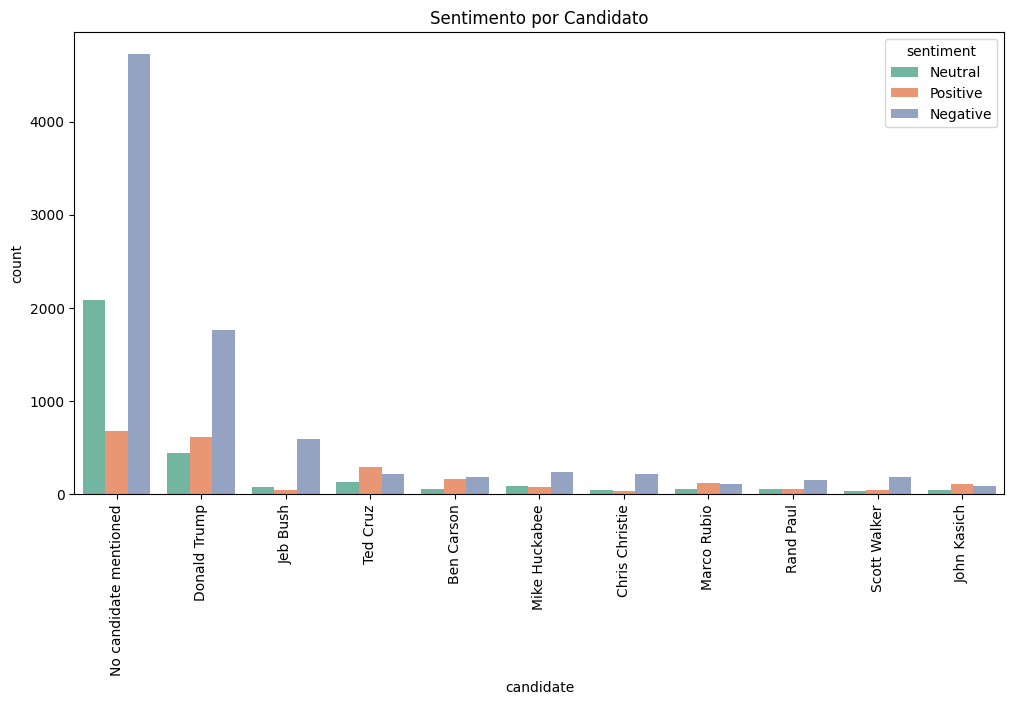

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='candidate', hue='sentiment', palette='Set2', order=df['candidate'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Sentimento por Candidato")
plt.show()


#### Retweets por Sentimento

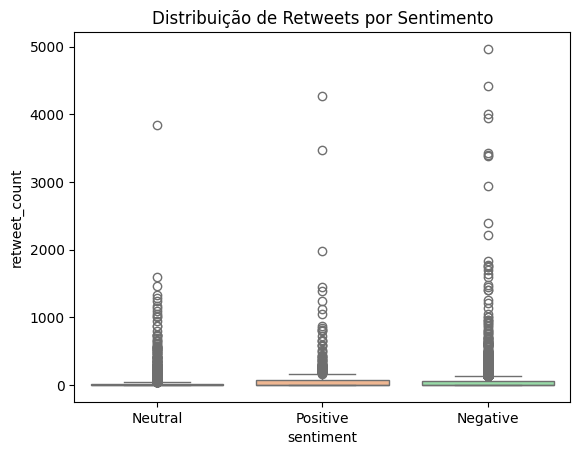

In [4]:
sns.boxplot(data=df, x='sentiment', y='retweet_count', palette='pastel')
plt.title("Distribuição de Retweets por Sentimento")
plt.show()


## Análise de Texto (NLP)

#### Pré-processamento

In [5]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # remove links, mentions e hashtags
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df['clean_text'] = df['text'].astype(str).apply(clean_text)


#### Nuvens de Palavras por Sentimento

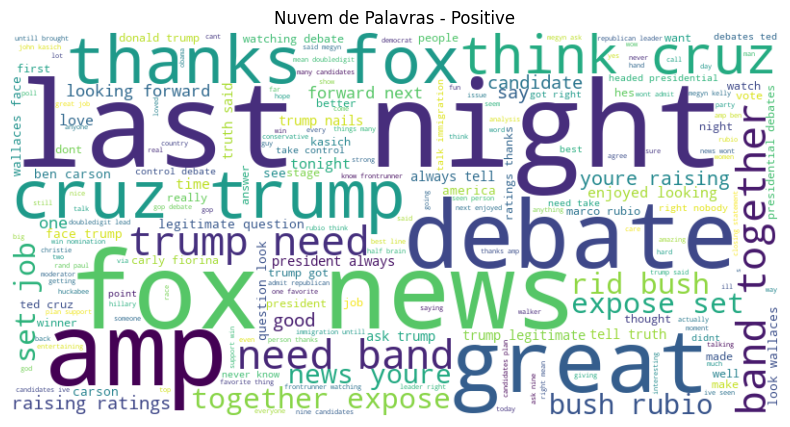

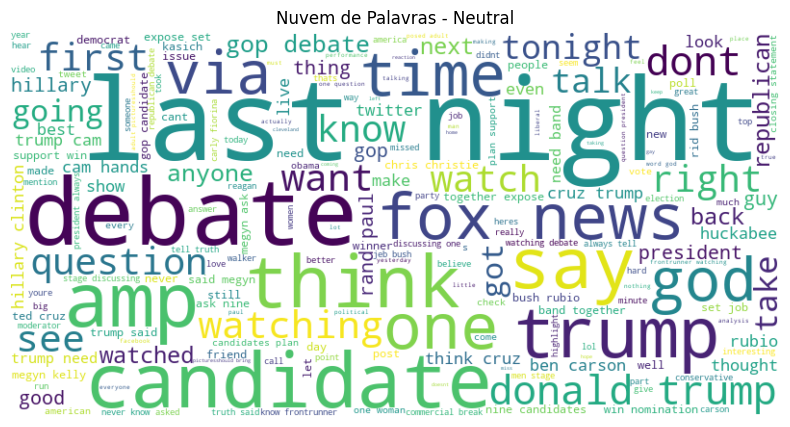

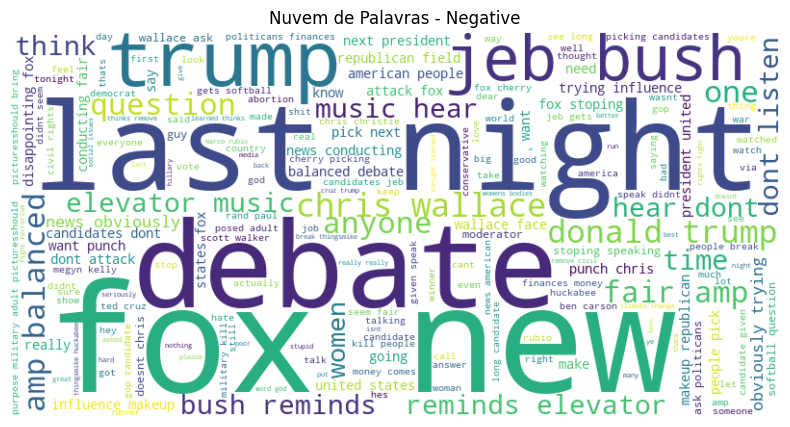

In [6]:
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nuvem de Palavras - {sentiment}")
    plt.show()


<Figure size 1200x600 with 0 Axes>

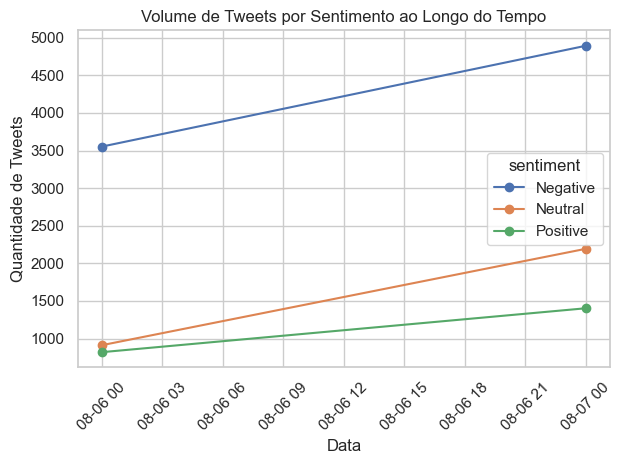

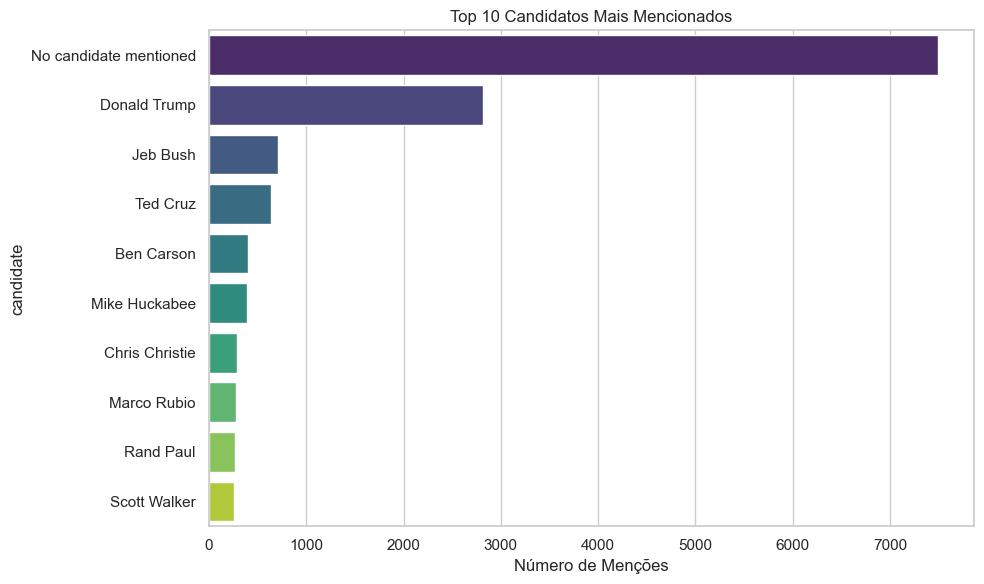

<Figure size 1200x600 with 0 Axes>

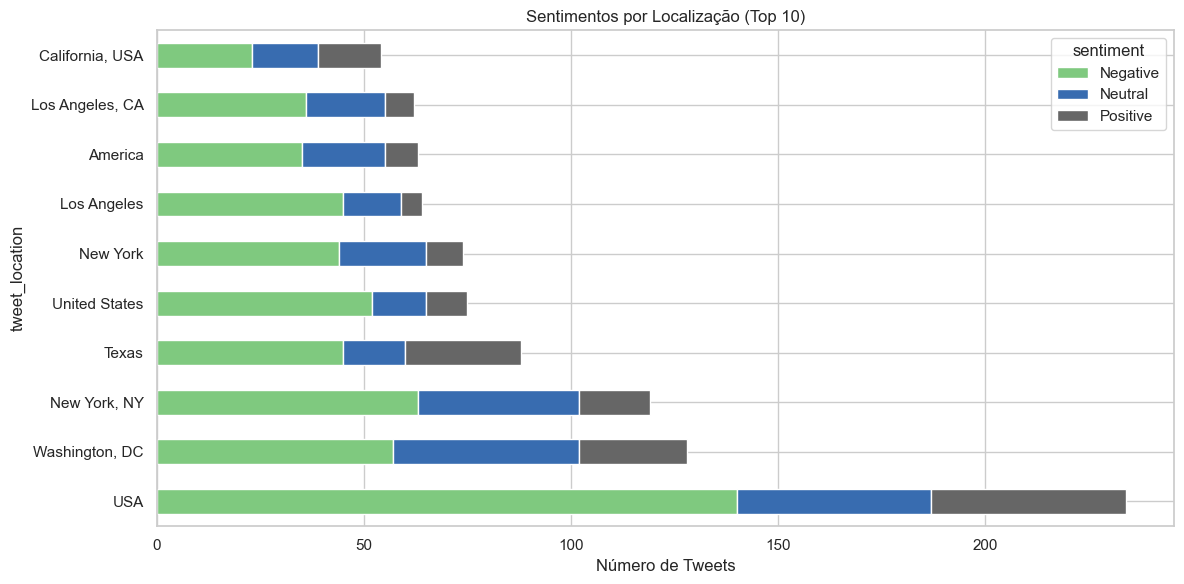

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Configurações visuais
sns.set(style="whitegrid")

#Sentimento ao longo do tempo
df_time_sentiment = df.copy()
df_time_sentiment['date'] = df_time_sentiment['tweet_created'].dt.date
time_sentiment = df_time_sentiment.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

#Top 10 candidatos mais mencionados
top_candidates = df['candidate'].value_counts().nlargest(10)

#Sentimento por localização geográfica
location_sentiment = df[df['tweet_location'].notna()].groupby(['tweet_location', 'sentiment']).size().unstack(fill_value=0)
top_locations = location_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
location_sentiment_top = location_sentiment.loc[top_locations.index]

#Exibindo os gráficos

#Evolução temporal dos sentimentos
plt.figure(figsize=(12, 6))
time_sentiment.plot(marker='o')
plt.title("Volume de Tweets por Sentimento ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade de Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 candidatos mais mencionados
plt.figure(figsize=(10, 6))
sns.barplot(x=top_candidates.values, y=top_candidates.index, palette="viridis")
plt.title("Top 10 Candidatos Mais Mencionados")
plt.xlabel("Número de Menções")
plt.tight_layout()
plt.show()

#Sentimentos por localizações mais ativas
plt.figure(figsize=(12, 6))
location_sentiment_top.plot(kind="barh", stacked=True, colormap="Accent", figsize=(12, 6))
plt.title("Sentimentos por Localização (Top 10)")
plt.xlabel("Número de Tweets")
plt.tight_layout()
plt.show()